In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from pylab import rcParams


# Importar a tabela de dados

df = pd.read_excel(r"Forecasting_FInal_Sales.xlsx")
display(df)

,Invdate,Qty,total_sales,mean_date
0,2016-05-02,3,68206.80,22735.600000
1,2016-05-03,1,15961.90,15961.900000
2,2016-05-07,2,60523.40,30261.700000
3,2016-05-10,4,140950.95,35237.737500
4,2016-05-11,3,39251.12,13083.706667
...,...,...,...,...
1292,2022-03-22,6,217071.23,36178.538333
1293,2022-03-23,4,91889.25,22972.312500
1294,2022-03-25,4,78806.76,19701.690000
1295,2022-03-28,4,71239.56,17809.890000


In [2]:
# Deletar as colunas q nao necessarias p/ facilitar o trabalho/visualizacao ("5S dos dados")


new_tab = df.drop(["Qty", "mean_date"], axis = 1) 
display(new_tab)

,Invdate,total_sales
0,2016-05-02,68206.80
1,2016-05-03,15961.90
2,2016-05-07,60523.40
3,2016-05-10,140950.95
4,2016-05-11,39251.12
...,...,...
1292,2022-03-22,217071.23
1293,2022-03-23,91889.25
1294,2022-03-25,78806.76
1295,2022-03-28,71239.56


In [3]:
#Identificando o tipo de variavel para melhor entendimento dos dados

new_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invdate      1297 non-null   datetime64[ns]
 1   total_sales  1297 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.4 KB


In [4]:
new_tab.set_index("Invdate",inplace=True)
new_tab


,total_sales
Invdate,
2016-05-02,68206.80
2016-05-03,15961.90
2016-05-07,60523.40
2016-05-10,140950.95
2016-05-11,39251.12
...,...
2022-03-22,217071.23
2022-03-23,91889.25
2022-03-25,78806.76


In [5]:
# Inplace mostrara agora como DatetimeIndex AS IS (Periodo:2016-05-02 to 2022-03-29) e antes era RangeIndex (acima).

new_tab.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1297 entries, 2016-05-02 to 2022-03-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  1297 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


In [6]:
#Calculando a media das vendas de cada mes e agrupando por ano

means = round(new_tab.groupby([(new_tab.index.year), (new_tab.index.month)]).mean())
display(means)

total_sales
Invdate Invdate             
2016    5            76192.0
        6            52277.0
        7            62992.0
        8            84834.0
        9            69489.0
...                      ...
2021    11          167136.0
        12          120267.0
2022    1           212947.0
        2           196982.0
        3           128770.0

[71 rows x 1 columns]

In [7]:
#Visualizando os meses (eixo x index) e os anos
index = means.index
print(index)


MultiIndex([(2016,  5),
            (2016,  6),
            (2016,  7),
            (2016,  8),
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (2017, 10),
            (2017, 11),
            (2017, 12),
            (2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (201

In [8]:
#Calculando a estatistica descritiva baseada nas medias dos meses para o periodo de maio 2016 a marco 2022 = 71 dados
#Em media, as vendas medias foram de $108679 variando de $33419. Parecido com a mediana 50%, ou seja 50% das vendas medias
#foram menores que $101879 e 50% maiores que esse mesmo valor. O menor e o maior valores de venda media foram
# $52277,00 e $212947,00 respectivamente.

round(means.describe())

,total_sales
count,71.0
mean,108679.0
std,33419.0
min,52277.0
25%,85723.0
50%,101879.0
75%,123512.0
max,212947.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f2586430>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f2586af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f25860d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f258e1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f258e550>],
 'means': []}

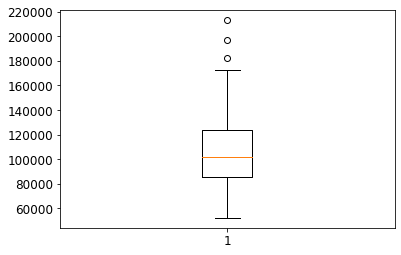

In [17]:
#Percebe que para valores onde a media das vendas eh > 50% = $101879,00 as vendas variam mais de um mes p outro.
# quando comparado com os valores menores que 50%. Tb houveram 3 dias que as vendas medias foram bem expressivas (altas)

%matplotlib inline
plt.boxplot(means)




<AxesSubplot:xlabel='Invdate,Invdate'>

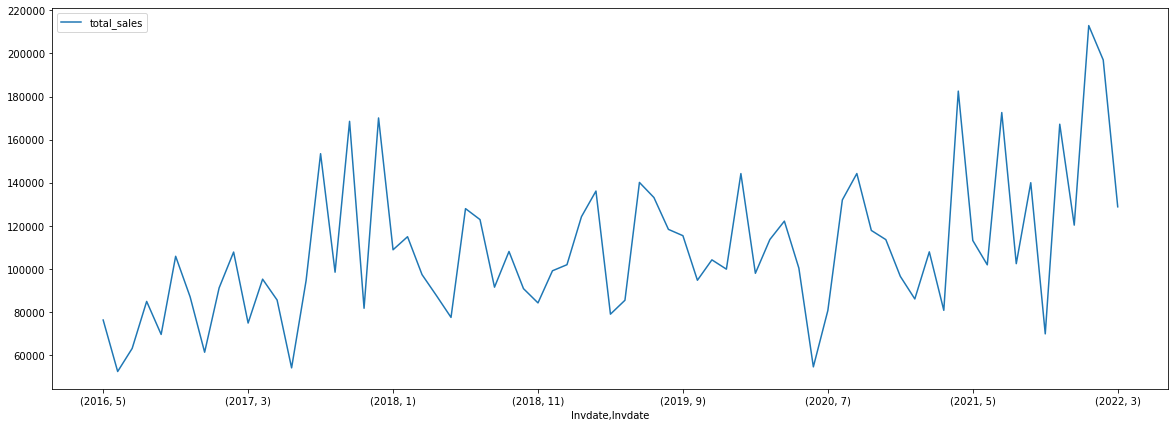

In [10]:
#Construindo o grafico sequencial: pelo grafico de medias das vendas percebe-se um crescimento de vendas ao longo tempo
#208 & 2019 tiveram performances bem parecidas. Em 2020 houve uma venda media bem baixa (justificada pelo inicio da 
#pandemia) e chamando atencao para uma tendencia de crescimento nas vendas medias apos esse inicio.

means.plot(figsize=(20,7))